In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [3]:
girls = pd.read_excel('../Data/babynames1996to2021.xlsx', sheet_name='2', skiprows=7, na_values =['[x]'], index_col='Name')
girls_ranks = girls[[col for col in girls.columns if col.endswith('Rank')]]

1
2


# Find Name Endings

In [4]:
new_index = []

for name in girls_ranks.index:
    if name.endswith('a') or name.endswith('ah'):
        new_index.append('a')
    elif name.endswith('ie') or name.endswith('y') or name.endswith('i') or name.endswith('ee'):
        new_index.append('ee')
    else: 
        new_index.append('other')
        
girls_ranks['Name Ending'] = new_index
girls_ranks = girls_ranks.set_index('Name Ending')

C:\Users\gv9\AppData\Local\Temp\ipykernel_33608\3632205730.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  girls_ranks['Name Ending'] = new_index


# Prepare for visualisationm

In [5]:
df = pd.DataFrame(columns=['Year', 'Name Ending'])

for col_name in girls_ranks.columns:
    year = col_name[:4]
    
    col = girls_ranks[col_name]
    col = col[col<101]
    
    mini_df = pd.DataFrame(col.index)

    mini_df['Year'] = year
    
    df = pd.concat([df, mini_df])
    
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Make visualisation

Text(0.5, 1.0, 'The Distribution of Girls Name Endings in Top Ranking Names from 1996-2021')

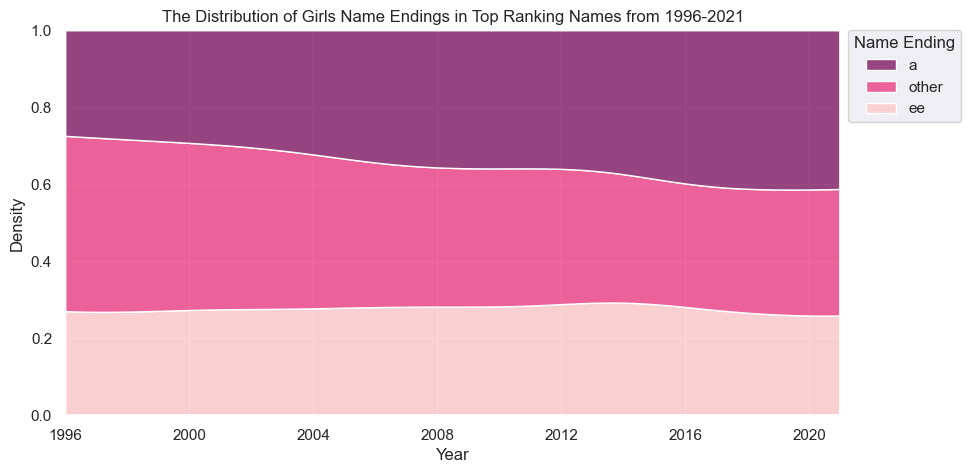

In [8]:
sns.set(rc={'figure.figsize':(10, 5)})

enmax_palette = ["#790C5A", "#EC347D", "#FFC6C7"]
sns.set_palette(palette=enmax_palette)

ax = sns.kdeplot(data=df, x="Year", hue="Name Ending", multiple="fill", cut=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.02))

plt.title('The Distribution of Girls Name Endings in Top Ranking Names from 1996-2021')
